# Exercise 1 - Calculate $\pi$

Using the **DSMC method**, calculate the value of **$\pi$**.


**Approach:**
In order to do this, create a 2-dimensional domain (defined by the coordinates $x_{min}, x_{max}, y_{min}, y_{max}$) and launch a number P of particles at random locations within. Check which particles lie inside a circle with radius $$ \frac{x_{max}-x_{min}}{2}, $$ where $x_{min}, x_{max}$ are the x-limits of your 2D domain. 

Get your value for $\pi$ by using the following formula:
$\pi = \frac{4 \cdot n_{inside}}{P},$ where $n_{inside}$ is the number of particles inside the circle and $P$ is the total number of particles.

**a)** Play around with the number of particles and plot your calculated value as a function of this number. 

**b)** Also plot the difference between the value you obtained for $\pi$ and the real one (as a function of P). 

**c)** Make a plot for your domain, highlighting the particles that are inside the circle.

P =    100,  pi ≈ 3.240000
P =    500,  pi ≈ 3.232000
P =   1000,  pi ≈ 3.160000
P =   2000,  pi ≈ 3.072000
P =   5000,  pi ≈ 3.146400
P =  10000,  pi ≈ 3.166000
P =  20000,  pi ≈ 3.147800
P =  50000,  pi ≈ 3.147760


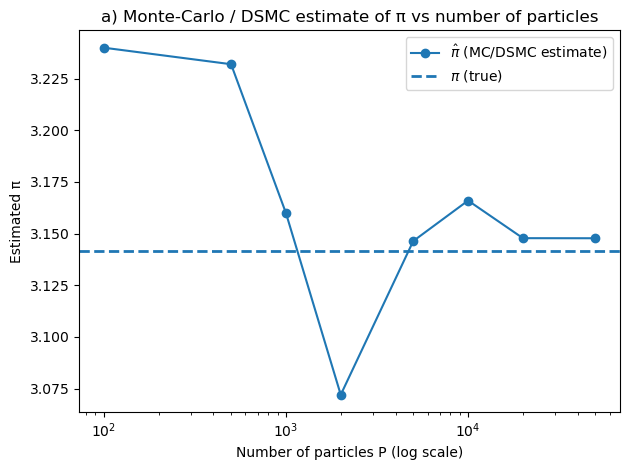

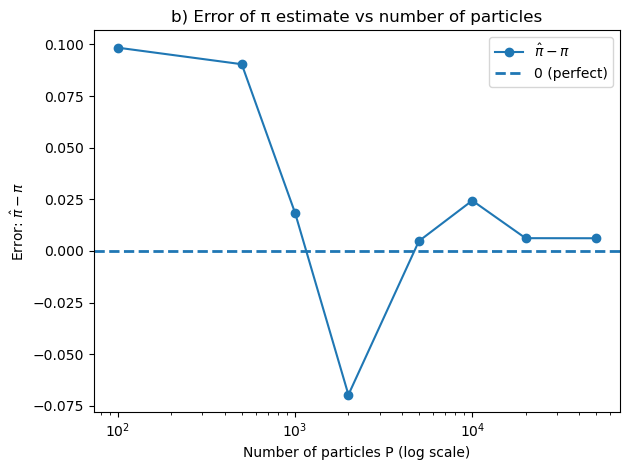

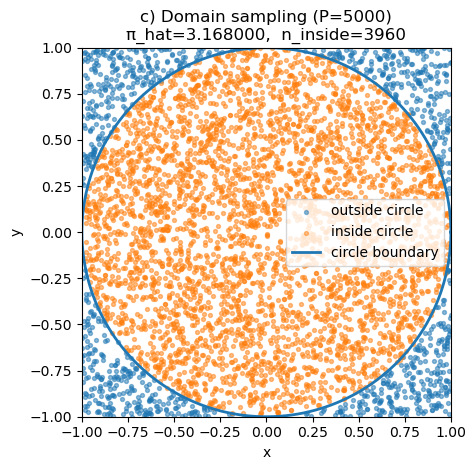

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import math

# ----------------------------------------
# # DSMC / Monte-Carlo method to estimate pi
# ----------------------------------------
def estimate_pi(P, xmin, xmax, ymin, ymax, seed=0):
    """
    Parameters
    ----------
    P : Number of particles (random points) 
    xmin, xmax, ymin, ymax : Rectangle boundaries of the 2D domain.
    seed : Seed for reproducible randomness.

    Returns
    -------
    pi_est : Monte-Carlo estimate of pi = 4 * n_inside / P.
    x, y : arrays with particle coordinates (length P each).
    inside : True for points inside the circle.
    """

    # Create random number generator (reproducible with a fixed seed).
    rng = np.random.default_rng(seed)

    # Define the circle
    cx = (xmax + xmin) / 2.0
    cy = (ymax + ymin) / 2.0
    r = (xmax - xmin) / 2.0

    # Sample particle positions in the rectangle
    x = rng.uniform(xmin, xmax, size=P)
    y = rng.uniform(ymin, ymax, size=P)

   # Check which particles are inside the circle.
    inside = (x - cx) ** 2 + (y - cy) ** 2 <= r ** 2
    
    # Count how many are inside
    n_inside = int(np.sum(inside))

    # Estimate pi from the fraction inside
    pi_est = 4.0 * n_inside / P

    return pi_est, x, y, inside


# ---------------------------------------------------------
# (a): π-Schätzung als Funktion der Partikelzahl P
# ---------------------------------------------------------



# Domain limits. Using a square makes the geometry match the pi/4 ratio good
xmin, xmax = -1.0, 1.0
ymin, ymax = -1.0, 1.0

# Verschiedene Partikelzahlen
P_values = [100, 500, 1000, 2000, 5000, 10_000, 20_000, 50_000]

pi_estimates = []
errors = []

i=0
for P in P_values:

    # perform one Monte-Carlo estimate of pi
    i=i+1
    pi_est, x, y, inside = estimate_pi(P, xmin, xmax, ymin, ymax, seed=12345 + i)
    pi_estimates.append(pi_est)
    errors.append(pi_est-math.pi)
    
    print(f"P = {P:6d},  pi ≈ {pi_est:.6f}")




# (a) Plot estimated pi as a function of number of particles P

plt.figure()
plt.plot(P_values, pi_estimates, marker="o", label=r"$\hat{\pi}$ (MC/DSMC estimate)")
plt.axhline(math.pi, linestyle="--", linewidth=2, label=r"$\pi$ (true)")
plt.xscale("log")  # log scale helps to see behavior across orders of magnitude
plt.xlabel("Number of particles P (log scale)")
plt.ylabel("Estimated π")
plt.title("a) Monte-Carlo / DSMC estimate of π vs number of particles")
plt.legend()
plt.tight_layout()
plt.show()


# (b) Plot the error: (pi_est - pi) as a function of P

plt.figure()
plt.plot(P_values, errors, marker="o", label=r"$\hat{\pi} - \pi$")
plt.axhline(0.0, linestyle="--", linewidth=2, label="0 (perfect)")
plt.xscale("log")
plt.xlabel("Number of particles P (log scale)")
plt.ylabel(r"Error: $\hat{\pi} - \pi$")
plt.title("b) Error of π estimate vs number of particles")
plt.legend()
plt.tight_layout()
plt.show()


# (c) Plot the domain and highlight inside-circle particles

P_vis = 5000
#estimate pi to create values for the plot
pi_est_vis, x_vis, y_vis, inside_vis = estimate_pi(P_vis, xmin, xmax, ymin, ymax, seed=999)



# Create circle boundary for plotting.
r = (xmax - xmin) / 2.0
cx = (xmax + xmin) / 2.0
cy = (ymax + ymin) / 2.0
theta = np.linspace(0, 2 * np.pi, 400)
circle_x = cx + r * np.cos(theta)
circle_y = cy + r * np.sin(theta)

plt.figure()
# outside points are points where "inside" is false; we select them from the list with [~inside]
plt.scatter(x_vis[~inside_vis], y_vis[~inside_vis], s=8, alpha=0.5, label="outside circle")
# inside points are points where "inside" is true; we select them from the list with [inside]
plt.scatter(x_vis[inside_vis],  y_vis[inside_vis],  s=8, alpha=0.5, label="inside circle")
plt.plot(circle_x, circle_y, linewidth=2, label="circle boundary")

# Make the plot look like a real 2D domain (equal aspect ratio).
plt.gca().set_aspect("equal", adjustable="box")
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

plt.xlabel("x")
plt.ylabel("y")
plt.title(f"c) Domain sampling (P={P_vis})\n"
          f"π_hat={pi_est_vis:.6f},  n_inside={int(np.sum(inside_vis))}")
plt.legend()
plt.tight_layout()
plt.show()


# Exercise 2 - Metropolis-Hastings

Using the Metropolis-Hastings algorithm, find the standard deviation $\sigma$ and mean value $\mu$ of a random Gaussian distribution. The data to be used for this exercise can be found in the file "input_data.txt".

**Approach (i.e. how the Metropolis-Hastings algorithm looks like):** Start with an initial guess for your standard deviation and mean (you can use the built-in numpy functions for this). 

Generate new values by adding some random noise to the previous/initial guess. Get the noise from a probability distribution. Use for example a Gaussian distribution which you can get via the function

In [ ]:
from scipy.stats import norm
norm(parameter, sigma_m).rvs()

from the scipy.stats package, where $sigma_m$ is the average step size. One can assume a value of 0.1 for this, or play around with this parameter and see what happens. Make sure your sigma isn't lower than zero, otherwise you will end up with NaNs or other weird values.

Compute the likelihood of your new values. Remember the likelihood formula from the lecture and apply it to your points. Compare the likelihood of the new and old values and accept the most relevant value. 

**Note:** Should the likelihood of your new value be lower than the older one, you can use the _acceptance-rejection criterion_ to determine which one to keep (see lecture slides and use a random _r_ value between 0 and 1).

Repeat until you converge on a value (ideally the same one as the values computed with the built-in functions).

For the following plots make sure to include the true values as well, i.e. overplot $\sigma$ and $\mu$ where relevant.

**a)** Plot $\mu$ as a function of the number of iterations.

**b)** Plot $\sigma$ as a function of the number of iterations.

**c)** Make a plot of the dataset you were given and overplot your best fit.

**d)** [OPTIONAL] Please repeat **a)**, **b)**, and **c)**, but this time use the emcee package discussed in Exercise Sheet 8. Do you get the same result as with your own implementation of an MCMC sampler? What is the difference between the sampler implemented by the emcee package and the Metropolis-Hastings algorithm?

mu (MH):      6.774109737318004
mu (numpy):   6.712507566383349
sigma (MH):   15.913058835759252
sigma (numpy): 15.657268993174121


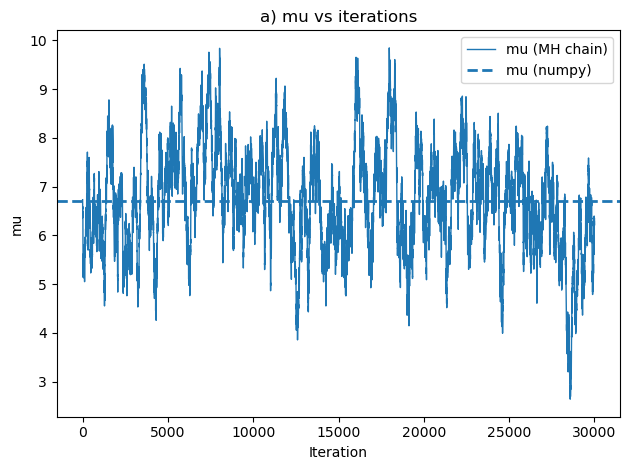

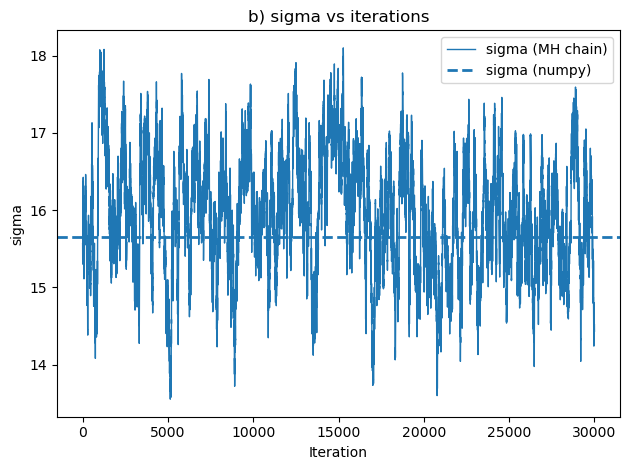

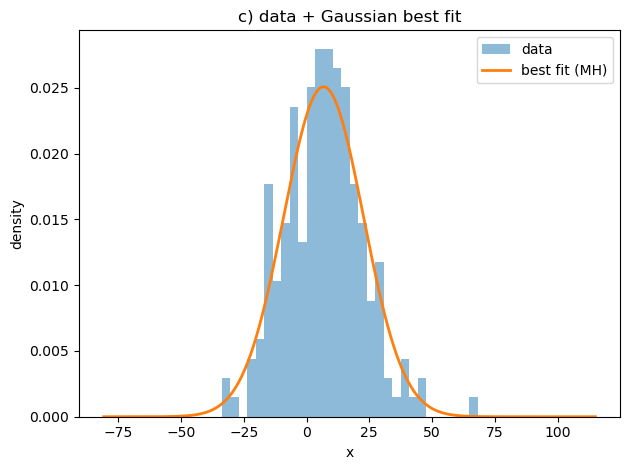

In [19]:
import numpy as np
import math
from scipy.stats import norm

# load Data
x = np.loadtxt("input_data.txt")
N = len(x)

# initial guess
mu_true = x.mean()
sigma_true = x.std()

# Log-Likelihood
# (see Lecture Notes p 29 and Notes below this code)
def logL(mu, sigma):
    
    #if sigma is negative it should never be chosen as new value, thus we assign -infinity as output
    if sigma <= 0:
        return -np.inf 
    return (
        -N * np.log(sigma)
        - 0.5 * N * np.log(2 * np.pi)
        - np.sum((x - mu)**2) / (2 * sigma**2)
    )
    
# Metropolis-Hastings

n_iter = 30000 #number of steps in Metropolis-Hastings
sigma_m = 0.1   # average step size


#start of chain
mu = mu_true
sigma = sigma_true

#initial likelihood
ll = logL(mu, sigma)

#initialize lists for results
mus = []
sigmas = []

rng = np.random.default_rng(0) #random number generator (used for Acceptance-rejection criterion (Lecture notes p.30)) 

for i in range(n_iter):

    #guess new values for mu/sigma
    #new parameter values are proposed by drawing from a Gaussian proposal distribution 
    #centered on the current parameter value, using scipy.stats.norm(parameter, sigma_m).rvs() 
    #The step size sigma_m controls the width of the proposal distribution.
    #<-- we make a random walk in mu/sigma space

    mu_p = norm(mu, sigma_m).rvs()
    sigma_p = norm(sigma, sigma_m).rvs()
    
    #check if sigma is positiv
#    if sigma_p <= 0:
#        sigma_p = abs(sigma_p)

    #caluculate new likelihood
    
    ll_p = logL(mu_p, sigma_p)

    #compare new likelihood with old likelihood (ll)
    #we accept new values, if new ll is better than old ll
    # OR we accept new values using the Acceptance-rejection criterion (Lecture notes p.30):
    # if alpha=e^(l_new - L_old) is smaller than a random number, we select the new values

    if ll_p > ll or rng.random() < math.exp(ll_p - ll):
        mu, sigma, ll = mu_p, sigma_p, ll_p


    #save the current situation
    mus.append(mu)
    sigmas.append(sigma)

#convert lists to numpy arrays

mus = np.array(mus)
sigmas = np.array(sigmas)

#define burn phase (i.e. the values from the beginning we throw away - 
#we only look at the values after the burn-in, Lecture Notes p.33)

burn = 5000

#take only the values of the array after burn-in
#calculate the mean of values

mu_burn = mus[burn:]
mu_est = mu_burn.mean()
sigma_burn = sigmas[burn:]
sigma_est = sigma_burn.mean()


print("mu (MH):     ", mu_est)
print("mu (numpy):  ", mu_true)
print("sigma (MH):  ", sigma_est)
print("sigma (numpy):", sigma_true)

# ==========================================================
# PLOTS (a), (b), (c)
# ==========================================================
import matplotlib.pyplot as plt

# a) Plot mu as a function of number of iterations
plt.figure()
plt.plot(mus, linewidth=1, label="mu (MH chain)")
plt.axhline(mu_true, linestyle="--", linewidth=2, label="mu (numpy)")
plt.xlabel("Iteration")
plt.ylabel("mu")
plt.title("a) mu vs iterations")
plt.legend()
plt.tight_layout()
plt.show()

# b) Plot sigma as a function of number of iterations
plt.figure()
plt.plot(sigmas, linewidth=1, label="sigma (MH chain)")
plt.axhline(sigma_true, linestyle="--", linewidth=2, label="sigma (numpy)")
plt.xlabel("Iteration")
plt.ylabel("sigma")
plt.title("b) sigma vs iterations")
plt.legend()
plt.tight_layout()
plt.show()

# c) Plot dataset + best fit (Gaussian with MH estimates)
plt.figure()

# Histogram of data (density=True so it matches a PDF scale)
plt.hist(x, bins=30, density=True, alpha=0.5, label="data")

# Gaussian PDF for MH best-fit
#create 500 values for x, with +/- 3 sigma around [xmin,xmax]
xgauss = np.linspace(x.min() - 3*sigma_true, x.max() + 3*sigma_true, 500)
#cacluclate probability density function
pdf_mh = (1.0 / (sigma_est * np.sqrt(2*np.pi))) * np.exp(-0.5 * ((xgauss - mu_est) / sigma_est)**2)
plt.plot(xgauss, pdf_mh, linewidth=2, label="best fit (MH)")



plt.xlabel("x")
plt.ylabel("density")
plt.title("c) data + Gaussian best fit")
plt.legend()
plt.tight_layout()
plt.show()

# Notes: Calculation of likelihood:

For a single data point $x_i$ and mean $\mu$ and standard deviation $\sigma$ the likelihood is (Lecture Notes p.29):

$$
L_i
=
\frac{1}{\sqrt{2\pi}\,\sigma}
\exp\!\left(
-\frac{(x_i - \mu)^2}{2\sigma^2}
\right)
$$

We calulate the log of the likelihood (to avoid very small values):

$$
\ln L_i
=
-\ln(\sigma)
-\frac{1}{2}\ln(2\pi)
-\frac{(x_i - \mu)^2}{2\sigma^2}
$$

We assume the data points are independent, then the total likelihood is the sum of all individual likelihoods: 


$$
\ln L
=
\sum_{i=1}^{N} \ln L_i
$$

Thus:

$$
\ln L
=
- N \ln \sigma
- \frac{N}{2}\ln(2\pi)
- \frac{1}{2\sigma^2}
\sum_{i=1}^{N} (x_i - \mu)^2
$$

## Interpretation of the Results

### a) and b) plot of μ and σ

The plot of the mean parameter μ shows that the Markov chain fluctuates around a stable value. There is no systematic drift visible, indicating that the chain has reached its stationary regime. This behavior indicates that the Metropolis–Hastings algorithm has successfully converged for the mean parameter and samples the region of high likelihood correctly. The plot of the standard deviation σ exhibits similar behavior.  No long-term trends or instabilities are observed. The width of the fluctuations reflects the statistical uncertainty in the estimation

### c) Data and Gaussian Best Fit

The histogram of the data is well described by a Gaussian distribution. The best-fit Gaussian obtained from the Metropolis–Hastings estimates is overplotted and matches the data histogram very well. This demonstrates that the assumption of normally distributed data is appropriate and that the Metropolis–Hastings algorithm reproduces the standard maximum-likelihood estimates.

### Overall

The Metropolis–Hastings algorithm converges reliably for both parameters μ and σ. The resulting estimates are consistent with the analytical numpy estimates, and the fitted Gaussian distribution provides an excellent description of the data. This confirms the correctness and robustness of the Metropolis–Hastings implementation.
